In [11]:
import sys
import gpxpy
import staticmaps
import osmnx as ox
import networkx as nx
import geohash as geohash
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [12]:
# Start Coding

In [13]:
train_df = pd.read_csv('train.csv')
# train_df=train_df.sample(n=500000,replace=True, random_state=1)
dup_train_df = train_df[train_df['TRIP_ID'].duplicated()]
dup_train_df.reset_index()
lst_duplicated_trip_id = list(dup_train_df['TRIP_ID']) 
cleaned_train_df = train_df[~train_df['TRIP_ID'].isin(lst_duplicated_trip_id)]

In [14]:
box=geohash.bbox("ez3fh")
box

{'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}

In [27]:
count=0
limit=0
lat_or=[]
long_or=[]
ylimit_low=box['s']
xlimit_low=box['w']
ylimit_high=box['n']
xlimit_high=box['e']
print(box)
for data in range(cleaned_train_df.shape[0]):
                    
    trajectories=[]
    count=count+1
    coord = cleaned_train_df.eval(cleaned_train_df[['POLYLINE']].values[data])[0]
    if(len(coord)<1):
        print(len(coord))
    else:
        
        xs, ys = zip(*coord)
        if((max(xs)<=xlimit_high) and (min(xs)>= xlimit_low) and (max(ys)<= ylimit_high) and (min(ys)>= ylimit_low) ):
            if(len(xs)>40):
                context = staticmaps.Context()
                context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
                limit=limit+1
                if(limit>5):
                    print("Raw no: "+str(count))
                    break
                print(limit)
                line=[]
                for i in range(len(xs)):
                    temp=staticmaps.create_latlng(ys[i], xs[i])
                    line.append(temp)
                context.add_object(staticmaps.Line(line,width=3))
                start = staticmaps.create_latlng(ys[0], xs[0])
                start_marker = staticmaps.ImageMarker(start, "start24.png", origin_x=10, origin_y=15)
                context.add_object(start_marker)
                end = staticmaps.create_latlng(ys[-1], xs[-1])
                end_marker = staticmaps.ImageMarker(end, "endblue24.png", origin_x=10, origin_y=15)
                context.add_object(end_marker)
#                 image = context.render_pillow(224, 224)
#                 image.save("staticmap/pillow/"+str(limit)+"_staticMapP.png")
                # render anti-aliased png (this only works if pycairo is installed)
                image = context.render_cairo(512, 512)
#                 image.write_to_png("staticmap/pillow/"+str(limit)+"_staticMap_anti.png")
                image.write_to_png("staticmap/cairo/"+str(limit)+"_staticMap_anti.png")
                
                    
                    
                
                


{'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}
1
2
3
4
5
Raw no: 212


# Merge with osmnx

In [23]:
import osmnx as ox
import networkx as nx
import geohash as geohash
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

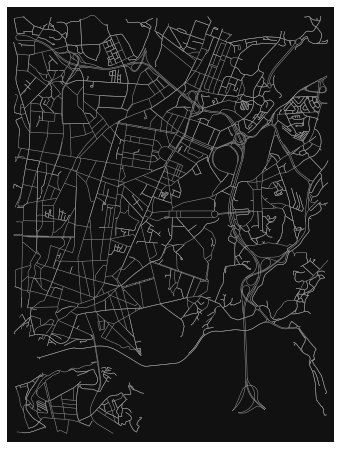

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [24]:
porto_graph=ox.graph_from_bbox(41.1767578125,41.1328125,-8.5693359375,-8.61328125,network_type = 'drive')

# G_projected = ox.project_graph(porto_graph)
ox.plot_graph(porto_graph,node_size=0, edge_linewidth=0.5)

In [38]:
# count=0
# limit=0
# lat_or=[]
# long_or=[]
# ylimit_low=box['s']
# xlimit_low=box['w']
# ylimit_high=box['n']
# xlimit_high=box['e']
# print(box)
# for data in range(cleaned_train_df.shape[0]):
                    
#     trajectories=[]
#     count=count+1
#     coord = cleaned_train_df.eval(cleaned_train_df[['POLYLINE']].values[data])[0]
#     if(len(coord)<1):
#         print(len(coord))
#     else:
        
#         xs, ys = zip(*coord)
#         if((max(xs)<=xlimit_high) and (min(xs)>= xlimit_low) and (max(ys)<= ylimit_high) and (min(ys)>= ylimit_low) ):
#             if(len(xs)>40):
#                 context = staticmaps.Context()
#                 context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
#                 limit=limit+1
#                 if(limit>5):
#                     print("Raw no: "+str(count))
#                     break
#                 print(limit)
#                 all_routes=[]
                
#                 for i in range(len(xs)-1):
#                     org = ox.nearest_nodes(porto_graph,xs[i],ys[i])
#                     dest = ox.nearest_nodes(porto_graph,xs[i+1],ys[i+1])
#                     try:
#                         shortest_route = nx.shortest_path(porto_graph,org,dest,weight='length') 
#                     except nx.NetworkXNoPath:
#                         print(" Route not found")
#                     if(len(shortest_route)>1):
#                         for route in shortest_route:
#                             if route not in all_routes:
#                                 all_routes.append(route)
#                 print(all_routes)
                
#                 line=[]
#                 for i in range(len(all_routes)):
#                     temp=staticmaps.create_latlng(porto_graph.nodes[all_routes[i]]['y'], porto_graph.nodes[all_routes[i]]['x'])
#                     line.append(temp)
#                 context.add_object(staticmaps.Line(line,width=3))
#                 start = staticmaps.create_latlng(porto_graph.nodes[all_routes[0]]['y'], porto_graph.nodes[all_routes[0]]['x'])
#                 start_marker = staticmaps.ImageMarker(start, "start24.png", origin_x=10, origin_y=15)
#                 context.add_object(start_marker)
#                 end = staticmaps.create_latlng(porto_graph.nodes[all_routes[-1]]['y'], porto_graph.nodes[all_routes[-1]]['x'])
#                 end_marker = staticmaps.ImageMarker(end, "endblue24.png", origin_x=10, origin_y=15)
#                 context.add_object(end_marker)
# #                 image = context.render_pillow(224, 224)
# #                 image.save("staticmap/pillow/"+str(limit)+"_staticMapP.png")
#                 # render anti-aliased png (this only works if pycairo is installed)
#                 image = context.render_cairo(512, 512)
#                 image.write_to_png("staticmap/pillow/"+str(limit)+"_staticMap.png")
        


In [11]:
count=0
limit=0
lat_or=[]
long_or=[]
ylimit_low=box['s']
xlimit_low=box['w']
ylimit_high=box['n']
xlimit_high=box['e']
print(box)
for data in range(cleaned_train_df.shape[0]):
                    
    trajectories=[]
    count=count+1
    coord = cleaned_train_df.eval(cleaned_train_df[['POLYLINE']].values[data])[0]
    if(len(coord)<1):
        print(len(coord))
    else:
        
        xs, ys = zip(*coord)
        if((max(xs)<=xlimit_high) and (min(xs)>= xlimit_low) and (max(ys)<= ylimit_high) and (min(ys)>= ylimit_low) ):
            if(len(xs)>40):
                context = staticmaps.Context()
                context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
                limit=limit+1
                if(limit>3):
                    print("Raw no: "+str(count))
                    break
                print(limit)
                all_routes=[]
                
                for i in range(len(xs)-1):
                    org = ox.nearest_nodes(porto_graph,xs[i],ys[i])
                    dest = ox.nearest_nodes(porto_graph,xs[i+1],ys[i+1])
                    all_routes.append(org)
                    all_routes.append(dest)
                
                line=[]
                for i in range(len(all_routes)):
                    temp=staticmaps.create_latlng(porto_graph.nodes[all_routes[i]]['y'], porto_graph.nodes[all_routes[i]]['x'])
                    line.append(temp)
                context.add_object(staticmaps.Line(line,width=3))
                start = staticmaps.create_latlng(porto_graph.nodes[all_routes[0]]['y'], porto_graph.nodes[all_routes[0]]['x'])
                start_marker = staticmaps.ImageMarker(start, "start16.png", origin_x=10, origin_y=15)
                context.add_object(start_marker)
                end = staticmaps.create_latlng(porto_graph.nodes[all_routes[-1]]['y'], porto_graph.nodes[all_routes[-1]]['x'])
                end_marker = staticmaps.ImageMarker(end, "endblue16.png", origin_x=10, origin_y=15)
                context.add_object(end_marker)
#                 image = context.render_pillow(224, 224)
#                 image.save("staticmap/pillow/"+str(limit)+"_staticMapP.png")
                # render anti-aliased png (this only works if pycairo is installed)
                image = context.render_cairo(512, 512)
                image.write_to_png("staticmap/pillow/"+str(limit)+"_staticMap_original.png")
        


{'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}
1
2
3
Raw no: 120


# Divide the image into 3

In [21]:
# def image_generation(range_start,range_stop,limit,sublimit,xs,ys): 
#     context = staticmaps.Context()
#     context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
#     line=[]
#     print(str(limit)+"_"+str(sublimit))

#     for i in range(range_start,range_stop,1):
#         temp=staticmaps.create_latlng(ys[i], xs[i])
#         line.append(temp)
#     context.add_object(staticmaps.Line(line,width=3))
#     start = staticmaps.create_latlng(ys[range_start], xs[range_start])
#     start_marker = staticmaps.ImageMarker(start, "start16.png", origin_x=10, origin_y=15)
#     context.add_object(start_marker)
#     end = staticmaps.create_latlng(ys[range_stop], xs[range_stop])
# #         end_marker = staticmaps.ImageMarker(end, "endblue16.png", origin_x=10, origin_y=15)
#     end_marker = staticmaps.ImageMarker(end, "end16.png", origin_x=10, origin_y=15)

#     context.add_object(end_marker)
#     image = context.render_cairo(512, 512)
#     image.write_to_png("staticmap/merge/"+str(limit)+"_"+str(sublimit)+"_staticMap_original.png")
#     return True


In [39]:
# from staticmap import StaticMap,Line
# def image_generation(range_start,range_stop,limit,sublimit,xs,ys): 
# #     context = staticmaps.Context()
#     context = StaticMap(512,512)
# #     context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
#     all_routes=[]
#     print(str(limit)+"_"+str(sublimit))
#     for i in range(range_start,range_stop,1):
#         org = ox.nearest_nodes(porto_graph,xs[i],ys[i])
#         all_routes.append(org)
                          
#     line=[]
#     unique_set = set(all_routes) 
#     print(len(unique_set))
#     if(len(unique_set))>1:
#         for i in range(len(all_routes)):
#             temp=[porto_graph.nodes[all_routes[i]]['y'], porto_graph.nodes[all_routes[i]]['x']]
#             print(temp)
#             line.append(temp)
# #         context.add_object(staticmaps.Line(line,width=4))
#         context.add_line(Line(line,width=4,color='red'))
        
# #         start = staticmaps.create_latlng(porto_graph.nodes[all_routes[0]]['y'], porto_graph.nodes[all_routes[0]]['x'])
# #         start_marker = staticmaps.ImageMarker(start, "start16.png", origin_x=10, origin_y=15)
# #         context.add_object(start_marker)
# #         end = staticmaps.create_latlng(porto_graph.nodes[all_routes[-1]]['y'], porto_graph.nodes[all_routes[-1]]['x'])
# #         end_marker = staticmaps.ImageMarker(end, "endblue16.png", origin_x=10, origin_y=15)
# #         end_marker = staticmaps.ImageMarker(end, "end16.png", origin_x=10, origin_y=15)
        
# #         context.add_object(end_marker)
# #         image = context.render_cairo(512, 512)
#         image = context.render()
#         image.save("staticmap/merge/"+str(limit)+"_"+str(sublimit)+"_staticMap_original_New_Zoom.png")
#         return True
#     else:
#         return False

In [57]:
def image_generation(range_start,range_stop,limit,sublimit,xs,ys): 
#     context = staticmaps.Context()
    context = staticmaps.Context()
    context.set_zoom(15)
    context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
    all_routes=[]
    print(str(limit)+"_"+str(sublimit))
    for i in range(range_start,range_stop,1):
        org = ox.nearest_nodes(porto_graph,xs[i],ys[i])
        all_routes.append(org)
                          
    line=[]
    unique_set = set(all_routes) 
    print(len(unique_set))
    if(len(unique_set))>1:
        for i in range(len(all_routes)):
            temp=staticmaps.create_latlng(porto_graph.nodes[all_routes[i]]['y'], porto_graph.nodes[all_routes[i]]['x'])
            line.append(temp)
        context.add_object(staticmaps.Line(line,width=4))
        start = staticmaps.create_latlng(porto_graph.nodes[all_routes[0]]['y'], porto_graph.nodes[all_routes[0]]['x'])
        start_marker = staticmaps.ImageMarker(start, "start16.png", origin_x=10, origin_y=15)
        context.add_object(start_marker)
        end = staticmaps.create_latlng(porto_graph.nodes[all_routes[-1]]['y'], porto_graph.nodes[all_routes[-1]]['x'])
        end_marker = staticmaps.ImageMarker(end, "endblue16.png", origin_x=10, origin_y=15)
#         end_marker = staticmaps.ImageMarker(end, "end16.png", origin_x=10, origin_y=15)
        
        context.add_object(end_marker)
        image = context.render_cairo(512, 512)
        image.write_to_png("staticmap/merge/"+str(limit)+"_"+str(sublimit)+"_staticMap_original.png")
        return True
    else:
        return False

In [59]:
count=0
limit=0
lat_or=[]
long_or=[]
ylimit_low=box['s']
xlimit_low=box['w']
ylimit_high=box['n']
xlimit_high=box['e']
print(box)
increment_value=30
for data in range(cleaned_train_df.shape[0]):                
    trajectories=[]
    count=count+1
    coord = cleaned_train_df.eval(cleaned_train_df[['POLYLINE']].values[data])[0]
    if(len(coord)<1):
        print(len(coord))
    else:
        xs, ys = zip(*coord)
        if((max(xs)<=xlimit_high) and (min(xs)>= xlimit_low) and (max(ys)<= ylimit_high) and (min(ys)>= ylimit_low) ):
            if(len(xs)>50): 
                limit=limit+1
                if(limit>600):
                    print("Raw no: "+str(count))
                    break
                print(limit)
                image_parameter=0
                next_image_parameter=0
                sublimit=1
                while(next_image_parameter<len(xs)):
                    # 30
                    next_image_parameter=image_parameter+increment_value
                    if(next_image_parameter>len(xs)):
                        next_image_parameter=len(xs)   
                    if(((next_image_parameter+increment_value)-next_image_parameter)<20):
                        next_image_parameter=len(xs)
                    if((next_image_parameter-image_parameter)>4):
                        print(image_parameter,next_image_parameter)
                        flag=image_generation(image_parameter,next_image_parameter,limit,sublimit,xs,ys)
                    image_parameter=next_image_parameter-1
                    if(flag):
                        sublimit=sublimit+1
                    
                
        


{'s': 41.1328125, 'w': -8.61328125, 'n': 41.1767578125, 'e': -8.5693359375}
1
0 30
1_1
4
29 59
1_2
2
58 88
1_3
2
87 117
1_4
2
116 146
1_5
2
145 151
1_6
1
2
0 30
2_1
13
29 54
2_2
1
3
0 30
3_1
21
29 59
3_2
1
58 88
3_2
13
87 109
3_3
6
4
0 30
4_1
16
29 59
4_2
1
58 88
4_2
1
87 117
4_2
1
5
0 30
5_1
15
29 59
5_2
10
58 88
5_3
1
6
0 30
6_1
17
29 59
6_2
17
58 71
6_3
5
7
0 30
7_1
21
29 52
7_2
11
0
8
0 30
8_1
19
29 54
8_2
17
9
0 30
9_1
12
29 51
9_2
13
10
0 30
10_1
25
29 56
10_2
14
11
0 30
11_1
19
29 59
11_2
13
58 65
11_3
1
12
0 30
12_1
15
29 55
12_2
15
0
13
0 30
13_1
18
29 59
13_2
7
58 88
13_3
12
87 117
13_4
10
116 138
13_5
5
14
0 30
14_1
18
29 59
14_2
13
58 81
14_3
16
15
0 30
15_1
10
29 51
15_2
13
16
0 30
16_1
19
29 53
16_2
10
17
0 30
17_1
9
29 55
17_2
13
18
0 30
18_1
19
29 58
18_2
15
19
0 30
19_1
18
29 59
19_2
18
0
20
0 30
20_1
1
29 59
20_1
1
58 88
20_1
1
87 117
20_1
1
116 142
20_1
1
21
0 30
21_1
21
29 52
21_2
14
22
0 30
22_1
20
29 59
22_2
10
58 63
22_3
1
23
0 30
23_1
10
29 59
23_2
15
58 74
23_3

192_2
12
58 70
192_3
2
193
0 30
193_1
24
29 59
193_2
10
58 64
193_3
1
0
194
0 30
194_1
17
29 59
194_2
19
195
0 30
195_1
19
29 59
195_2
21
58 64
195_3
1
196
0 30
196_1
21
29 53
196_2
16
197
0 30
197_1
17
29 59
197_2
10
58 74
197_3
7
198
0 30
198_1
8
29 51
198_2
13
199
0 30
199_1
16
29 51
199_2
16
0
200
0 30
200_1
16
29 59
200_2
21
58 63
200_3
4
201
0 30
201_1
14
29 55
201_2
11
202
0 30
202_1
12
29 59
202_2
11
203
0 30
203_1
9
29 59
203_2
10
58 65
203_3
3
204
0 30
204_1
20
29 59
204_2
13
58 88
204_3
1
205
0 30
205_1
21
29 59
205_2
20
206
0 30
206_1
27
29 51
206_2
1
207
0 30
207_1
10
29 59
207_2
22
58 66
207_3
2
208
0 30
208_1
20
29 53
208_2
19
209
0 30
209_1
26
29 59
209_2
16
58 88
209_3
12
87 112
209_4
13
210
0 30
210_1
15
29 59
210_2
21
211
0 30
211_1
8
29 57
211_2
20
212
0 30
212_1
1
29 59
212_1
1
58 88
212_1
1
87 97
212_1
4
213
0 30
213_1
26
29 55
213_2
17
214
0 30
214_1
21
29 51
214_2
15
215
0 30
215_1
1
29 59
215_1
21
58 67
215_2
4
216
0 30
216_1
13
29 57
216_2
18
217
0 30
217_1
24

18
29 58
379_2
8
380
0 30
380_1
22
29 51
380_2
16
381
0 30
381_1
27
29 54
381_2
20
382
0 30
382_1
22
29 51
382_2
11
0
383
0 30
383_1
19
29 52
383_2
17
384
0 30
384_1
25
29 59
384_2
20
58 68
384_3
5
385
0 30
385_1
20
29 54
385_2
14
386
0 30
386_1
20
29 59
386_2
20
58 68
386_3
4
0
0
0
387
0 30
387_1
12
29 59
387_2
1
58 88
387_2
1
87 116
387_2
9
388
0 30
388_1
1
29 59
388_1
8
58 88
388_2
16
87 117
388_3
5
116 125
388_4
1
389
0 30
389_1
14
29 52
389_2
10
0
390
0 30
390_1
24
29 51
390_2
20
391
0 30
391_1
16
29 53
391_2
18
392
0 30
392_1
22
29 54
392_2
16
393
0 30
393_1
17
29 59
393_2
15
58 74
393_3
1
394
0 30
394_1
11
29 52
394_2
19
395
0 30
395_1
21
29 59
395_2
26
396
0 30
396_1
1
29 59
396_1
1
58 88
396_1
1
87 117
396_1
1
116 146
396_1
1
145 175
396_1
1
174 204
396_1
1
203 233
396_1
1
232 237
396_1
1
397
0 30
397_1
1
29 59
397_1
1
58 88
397_1
1
87 117
397_1
1
116 146
397_1
1
145 175
397_1
2
174 204
397_2
1
203 233
397_2
1
232 250
397_2
1
398
0 30
398_1
12
29 52
398_2
13
0
0
399
0 30
399_1

561_2
13
58 74
561_3
9
0
562
0 30
562_1
18
29 55
562_2
6
0
0
563
0 30
563_1
15
29 59
563_2
25
0
0
0
564
0 30
564_1
9
29 59
564_2
6
565
0 30
565_1
16
29 59
565_2
20
58 69
565_3
2
566
0 30
566_1
18
29 59
566_2
16
567
0 30
567_1
11
29 59
567_2
1
58 72
567_2
1
568
0 30
568_1
17
29 58
568_2
14
569
0 30
569_1
1
29 59
569_1
1
58 88
569_1
1
87 117
569_1
1
116 121
569_1
1
570
0 30
570_1
15
29 52
570_2
17
571
0 30
571_1
14
29 57
571_2
14
572
0 30
572_1
14
29 53
572_2
18
573
0 30
573_1
25
29 51
573_2
14
574
0 30
574_1
17
29 59
574_2
1
58 82
574_2
17
0
575
0 30
575_1
25
29 59
575_2
24
576
0 30
576_1
24
29 59
576_2
3
0
0
577
0 30
577_1
1
29 59
577_1
15
58 74
577_2
9
578
0 30
578_1
22
29 51
578_2
17
0
0
579
0 30
579_1
25
29 53
579_2
13
0
580
0 30
580_1
14
29 59
580_2
4
58 88
580_3
6
87 117
580_4
11
116 143
580_5
7
581
0 30
581_1
17
29 59
581_2
16
58 69
581_3
5
582
0 30
582_1
19
29 59
582_2
20
0
583
0 30
583_1
20
29 56
583_2
19
584
0 30
584_1
10
29 59
584_2
17
58 65
584_3
5
585
0 30
585_1
1
29 59
585